In [23]:
import matplotlib
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from plotnine import *

from matplotlib import rcParams
rcParams['figure.figsize'] = (10, 8)

In [24]:
# %%R

# require('ggplot2')
# require('readr')
# require('extrafont')
# require('dplyr')
# require('reshape2')
# require('tidyr')
# require('explore')
# require('forcats')
# require('theme538')

In [25]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
df = pd.read_csv('../five-years-spill_incidents.csv')
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(" ", "_")

<AxesSubplot:>

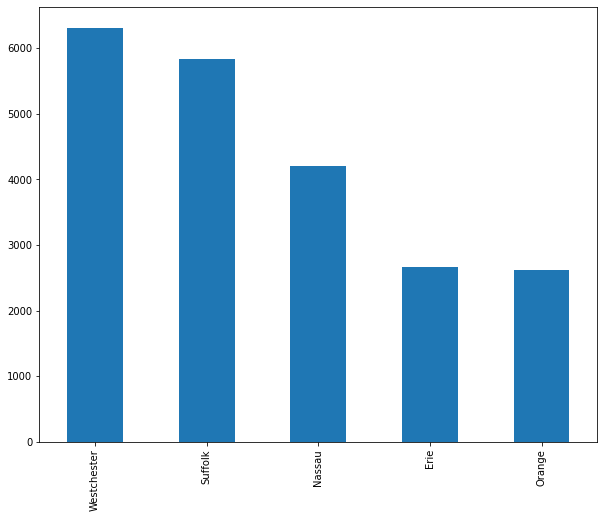

In [27]:
df.county.value_counts().head(5).plot(kind='bar')

In [61]:
counties_to_plot = df.groupby(by='county')['quantity'].agg('sum').sort_values(ascending=False).head(5).reset_index
counties_to_plot

<bound method Series.reset_index of county
Albany     1.000004e+11
Queens     3.658503e+06
Erie       3.638345e+06
Ontario    2.648872e+06
Niagara    2.254495e+06
Name: quantity, dtype: float64>

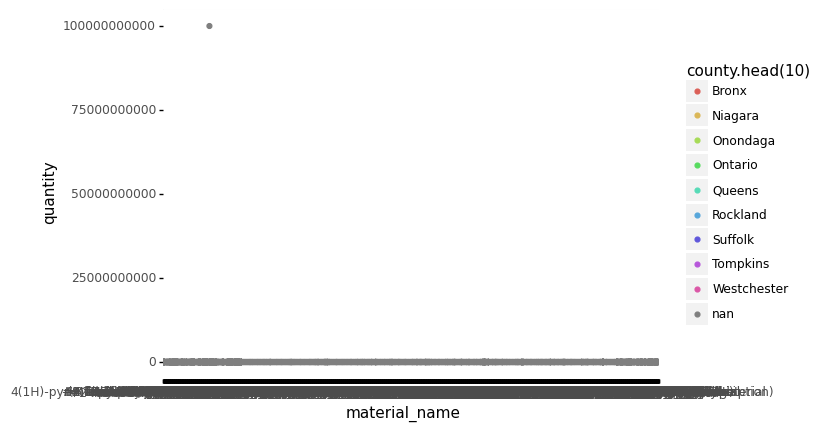

<ggplot: (382272368)>

In [63]:
ggplot(df, aes(x='material_name', y='quantity', color='county.head(10)'))+geom_point()

In [86]:
counties_to_plot = df.groupby(['county', 'material_name'])['quantity'].agg('sum').reset_index().sort_values(by='quantity', ascending=False).head(10)
counties_to_plot

,county,material_name,quantity
42,Albany,food waste,1.000000e+11
3821,Queens,jet fuel,3.450448e+06
1272,Erie,diesel,3.204201e+06
3296,Ontario,raw sewage,2.600050e+06
800,Chemung,diesel,1.790463e+06
4788,St Lawrence,raw sewage,1.000305e+06
2952,Niagara,wastewater,7.544270e+05
2896,Niagara,other - rain water,5.346070e+05
2917,Niagara,other - untreated water,5.250000e+05
3592,Oswego,diesel,4.212245e+05


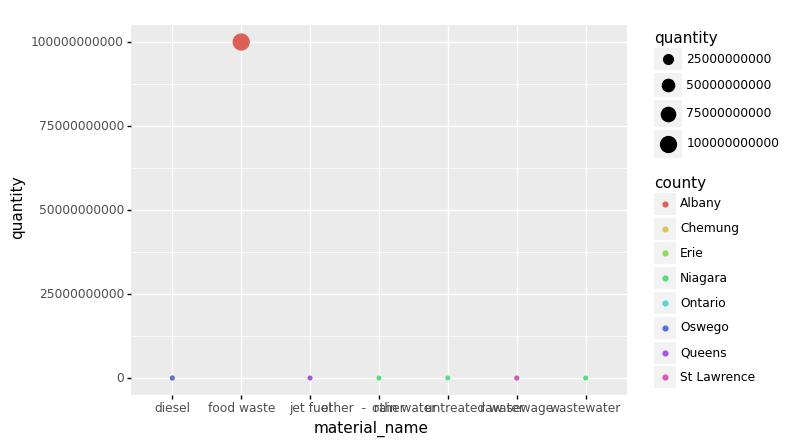

<ggplot: (371740666)>

In [87]:
ggplot(counties_to_plot, aes(x='material_name', y='quantity', color='county'))+geom_point(aes(size = 'quantity'))

In [82]:
df.head(10)

,spill_number,program_facility_name,street_1,street_2,locality,county,zip_code,swis_code,dec_region,spill_date,received_date,contributing_factor,waterbody,source,close_date,material_name,material_family,quantity,units,recovered
0,1609169,AIRPORT,136 TOWER RD,NaN,WEST HARRISON,Westchester,NaN,6028,3,01/02/2017,01/02/2017,Equipment Failure,NaN,Commercial/Industrial,01/03/2017,jet fuel,Petroleum,6.0,Gallons,0.0
1,1609177,COMMERCIAL TOMPKINS CONSOLIDATED,737 WILLOW AVE,NaN,ITHICA,Tompkins,NaN,5507,7,01/02/2017,01/02/2017,Equipment Failure,NaN,Commercial/Industrial,01/04/2017,diesel,Petroleum,0.5,Gallons,0.0
2,1609167,COMMERCIAL,1550 BALMER RD,NaN,MODEL CITY,Niagara,14107,3230,9,01/02/2017,01/02/2017,Equipment Failure,NaN,Commercial/Industrial,01/03/2017,landfill leachate,Other,1.0,Gallons,1.0
3,1609170,CONCRETE,8 FORT CLINTON WAY,NaN,BEAR MOUNTAIN,Rockland,NaN,4428,3,01/02/2017,01/02/2017,Human Error,NaN,Commercial/Industrial,01/03/2017,#2 fuel oil,Petroleum,1.0,Gallons,0.0
4,1609358,FULLAM RESIDENCE,16 COMPASS COURT,NaN,HUNTINGTON,Suffolk,NaN,5226,1,01/02/2017,01/09/2017,Human Error,NaN,Private Dwelling,03/16/2017,#2 fuel oil,Petroleum,2.0,Gallons,0.0
5,1609175,GRASS,514 COUNTY ROAD 7,NaN,MANCHESTER,Ontario,NaN,3536,8,01/02/2017,01/02/2017,Traffic Accident,NaN,Unknown,01/11/2017,transformer oil,Petroleum,0.0,NaN,0.0
6,1609172,LOWE'S,3030 SESSLER DRIVE,NaN,GENEVA,Ontario,NaN,3530,8,01/02/2017,01/02/2017,Equipment Failure,NaN,Commercial/Industrial,01/03/2017,hydraulic oil,Petroleum,0.0,NaN,0.0
7,1609174,POLE TOP TRANSFORMER,5749 STEVENS DR,NaN,CICERO,Onondaga,NaN,3422,7,01/02/2017,01/02/2017,Equipment Failure,NaN,Commercial/Industrial,01/04/2017,transformer oil,Petroleum,4.0,Gallons,0.0
8,1609181,RESIDENCE,848 EAST 218TH ST,NaN,BRONX,Bronx,NaN,301,2,01/02/2017,01/03/2017,Equipment Failure,NaN,Private Dwelling,01/03/2017,#2 fuel oil,Petroleum,1.0,Gallons,0.0
9,1609179,RESIDENTIAL,101-16 LIBERTY AVE,NaN,OZONE PARK,Queens,NaN,4101,2,01/02/2017,01/02/2017,Equipment Failure,NaN,Private Dwelling,01/03/2017,#2 fuel oil,Petroleum,1.0,Gallons,0.0


In [83]:
df.shape

(61189, 20)

In [ ]:
df.